In [1]:
import nbsetup
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import ergodicpy as ep

In [13]:
x_from = 2
x_to = 3
samples = 10000
ensembles = 20
rnge = np.linspace(x_from, x_to, 20)
obs = [np.random.power(i, size=samples) for i in rnge]

In [14]:
ee = ep.ErgodicEnsemble(obs)

In [15]:
stab = ee.stablize(depth=20, spread=30)
stab[1][stab[0]]

array([4.43000000e+02, 3.17180805e-02])

In [16]:
ys = ee.stablize(optimized=False, plot=True)

KeyboardInterrupt: 

<AxesSubplot:>

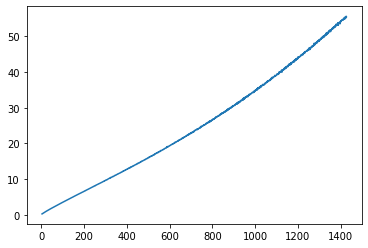

In [17]:
ys = []
xs = range(4,int(samples/7))
for c in xs:
    ee.bins = ep.bino(ee.observations,c)
    ee.analyse()
    ys.append(ee.complexity*c)
sns.lineplot(x=xs, y=ys)

In [18]:
def regression(x, y):
    from sklearn.linear_model import LinearRegression
    x = np.array(x).reshape(-1,1)
    y = np.array(y)
    m = LinearRegression().fit(x, y)
    return (m.coef_, m.intercept_, m.score(x, y))

In [32]:
r = regression(xs, ys)

In [33]:
r[0][0]

0.03785108634015812

<AxesSubplot:>

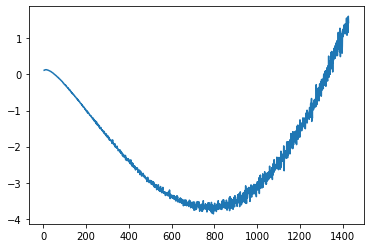

In [34]:
sns.lineplot(x=xs, y=[y-r[0][0]*xs[i] for i,y in enumerate(ys)])